# Data Scientist Challenge

In this challenge you are assuming the position of a data scientist for a large corporation with offices in many states. The company you work for is looking to gain insights from its purchase order data during the year 2014. You have 10,000 different purchase orders from different states. The state, date, and revenue are recorded from each purchase order.

The company is primarily interested in determining what is happening to revenue over time and what strategy should be undertaken to maximize revenue.

You don't need any advanced statistics for this assignment. Good exploratory data analysis and visualizations will reveal everything you need to know about what is happening. Check out pandas time-series module documentation here - http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('../../data/orders.csv', parse_dates=['order_date'])
orders.head()

,state,order_date,revenue
0,Arkansas,2014-12-24,1311.0
1,Florida,2014-10-15,698.0
2,Iowa,2014-09-07,1193.0
3,Indiana,2014-05-19,469.0
4,Maine,2014-04-19,334.0


# Executive Summary
Revenue per order is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because the states with high average revenue greatly increased their total number of orders as the year went on. The states that had low average revenue decreased in frequency of orders from the start of the year. 

This current trend may or may not necessarily indicate a problem but it certainly cannot continue indefinitely.

# Data Inspection
Get a brief summary description of the columns. From the .info method below we can see there are no missing values and the date values are already converted to datetime64 which makes it easy to apply date methods to them.

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
state         10000 non-null object
order_date    10000 non-null datetime64[ns]
revenue       10000 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.5+ KB


### Count of Orders per state
We can start the exploration by getting the raw counts of number of orders per state. From the plot below, all states have plenty of orders. There appear to be no outliers. The plot is done in seaborn and with pandas.

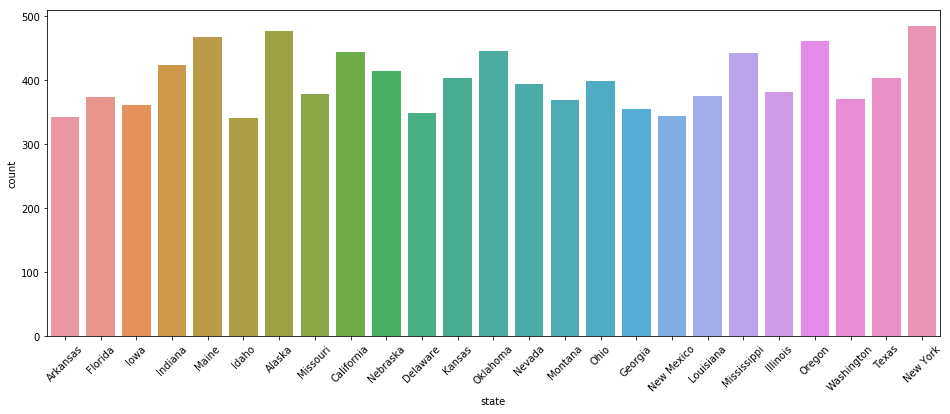

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='state', data=orders, ax=ax)
ax.tick_params(axis='x', rotation=45)

# Get Overall Revenue Picture
A scatterplot of revenue over time is created. A smaller marker size is used to more finely display the data. This is the first chart to show some pattern. There appear to be two groups, one with higher revenue and one with lower.

### Note: There is currently a bug in Seaborn that forces us to change the limits of the x-axis

Text(0.5, 1.0, 'Figure 2: All Orders')

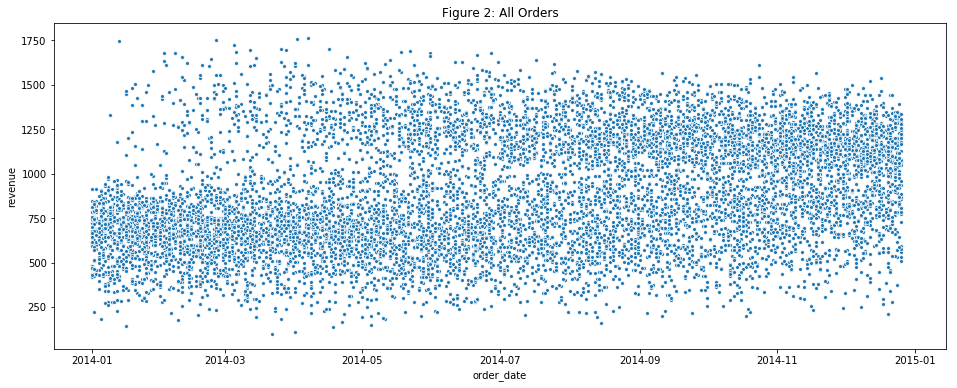

In [5]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.scatterplot('order_date', 'revenue', data=orders, s=15)

# When the bug is fixed, the next two lines should not be necessary
left = np.datetime64('2013-12-15')
right = np.datetime64('2015-01-15')

ax.set_xlim(left, right)
ax.set_title('Figure 2: All Orders')

# Is revenue different by state?
Average revenue per state is calculated and plotted below. There is a huge difference between states and it appears that several states cluster together with the same exact revenue.

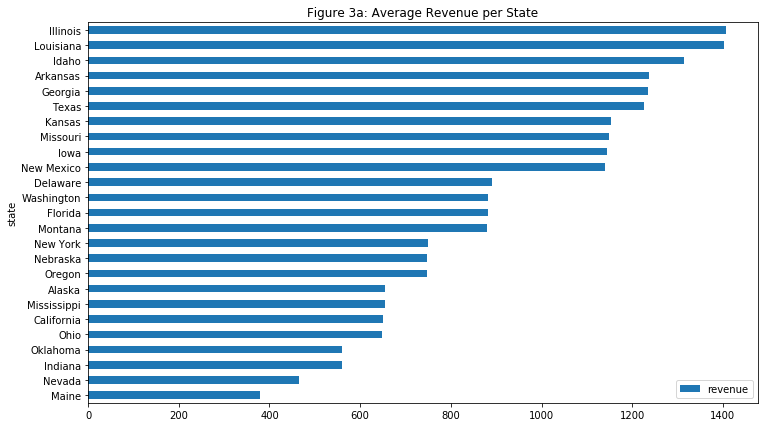

In [6]:
orders.groupby('state').agg({'revenue':'mean'})\
      .sort_values('revenue')\
      .plot(kind='barh', figsize=(12,7), title='Figure 3a: Average Revenue per State')

### Replicated with Seaborn

/Users/Ted/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


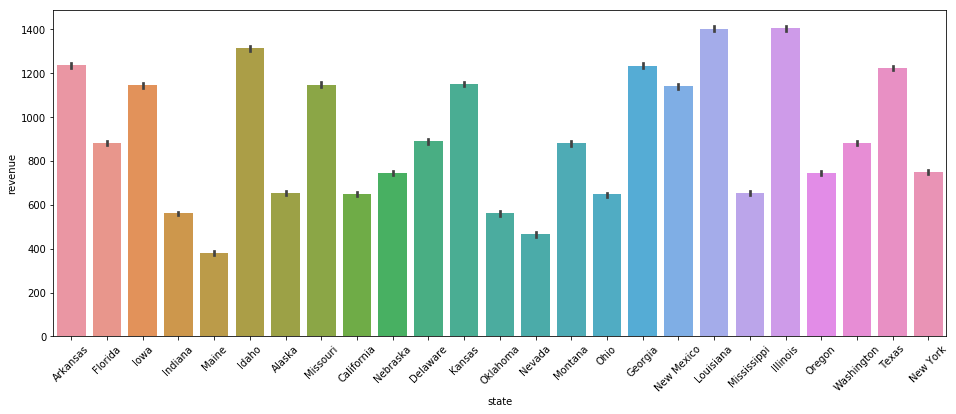

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='state', y='revenue', data=orders, ax=ax)
ax.tick_params(axis='x', rotation=45)

# Average revenue per order by month
We will put the start date in the index column to facilitate pandas time grouping functionality. The plot below shows that average revenue per order by month is increasing. Revenue appears to be growing nicely for the company.

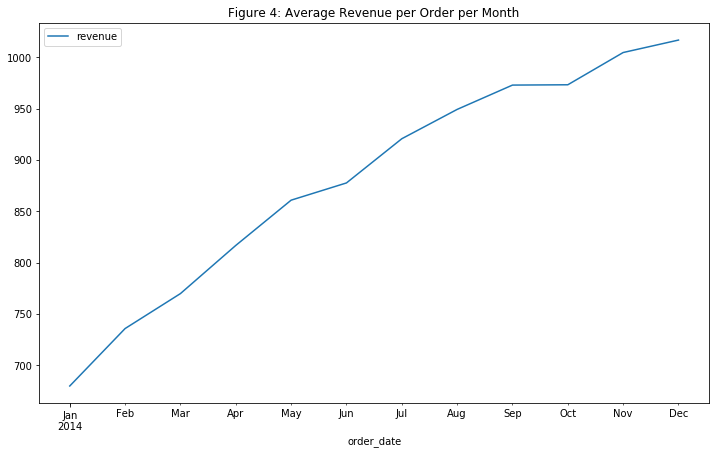

In [8]:
orders.resample('M', on='order_date').agg({'revenue':'mean'})\
      .plot(figsize=(12,7), title='Figure 4: Average Revenue per Order per Month');

# Total Revenue per month
Overall, the actual total revenue per month is also increasing even though December was a poor month.

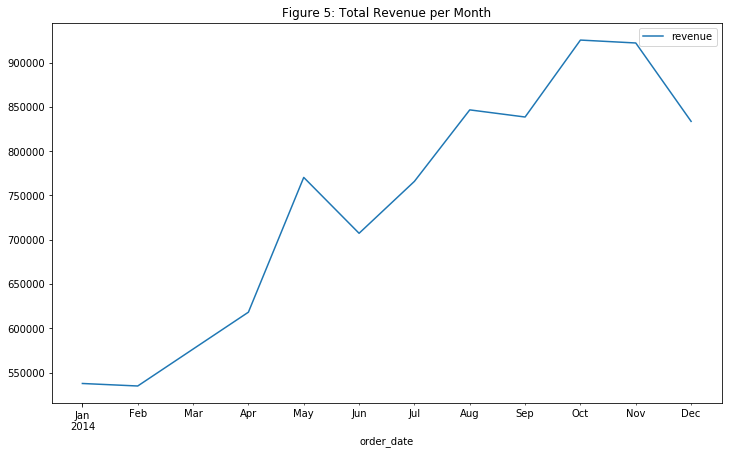

In [9]:
# But what about total revenue? Still looks good
orders.resample('M', on='order_date').agg({'revenue':'sum'})\
       .plot(figsize=(12,7), title='Figure 5: Total Revenue per Month');

# Total Revenue per State
The above plots looked at total and average revenue without differentiating between states. Let's add another level of dimensionality and plot the same data by state. 

From the plot below, we clearly see two groups. One with total revenue going up and the other going down

In [10]:
tg = pd.Grouper(key='order_date', freq='M')
orders_state_total = orders.pivot_table(index=tg, columns='state', values='revenue', aggfunc='sum')
orders_state_total

state,Alaska,Arkansas,California,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,...,Montana,Nebraska,Nevada,New Mexico,New York,Ohio,Oklahoma,Oregon,Texas,Washington
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,46852.0,1445.0,57488.0,3252.0,5029.0,2867.0,4537.0,1744.0,38614.0,3668.0,...,3738.0,45514.0,26245.0,1424.0,56641.0,44284.0,44276.0,54839.0,1296.0,2042.0
2014-02-28,50926.0,10732.0,34943.0,8061.0,8010.0,12975.0,5767.0,9935.0,26023.0,10145.0,...,4560.0,38359.0,28115.0,7343.0,46122.0,37831.0,34877.0,48568.0,10067.0,4015.0
2014-03-31,37860.0,9597.0,34562.0,8723.0,10537.0,16705.0,15601.0,27774.0,28274.0,11396.0,...,17473.0,45913.0,27616.0,10581.0,50917.0,30251.0,31233.0,36390.0,14421.0,12123.0
2014-04-30,35960.0,14501.0,32918.0,26431.0,13113.0,20010.0,20521.0,26868.0,21643.0,20112.0,...,14276.0,36721.0,17232.0,17658.0,43186.0,25928.0,27764.0,40054.0,26871.0,13363.0
2014-05-31,34685.0,33597.0,23480.0,25922.0,23559.0,34602.0,38025.0,38581.0,28692.0,34826.0,...,27956.0,30006.0,17545.0,26177.0,35651.0,24094.0,26468.0,39894.0,36363.0,25061.0
2014-06-30,21115.0,36756.0,26395.0,22443.0,33545.0,29898.0,33992.0,49981.0,22341.0,29650.0,...,21156.0,26334.0,21328.0,37659.0,25727.0,25390.0,22295.0,23095.0,32964.0,25524.0
2014-07-31,20751.0,40456.0,19124.0,24870.0,32775.0,50998.0,46123.0,43168.0,19619.0,44582.0,...,27394.0,22396.0,13133.0,34206.0,32555.0,15673.0,17334.0,25316.0,51153.0,35674.0
2014-08-31,20418.0,47748.0,20223.0,28133.0,37439.0,36247.0,45472.0,63983.0,20309.0,45929.0,...,37482.0,25463.0,10521.0,54100.0,20406.0,15791.0,15684.0,23106.0,48350.0,34212.0
2014-09-30,15134.0,53743.0,11076.0,32588.0,31116.0,61039.0,44136.0,57519.0,10255.0,52084.0,...,37590.0,12260.0,8465.0,54344.0,17316.0,14869.0,11551.0,16402.0,57369.0,45990.0


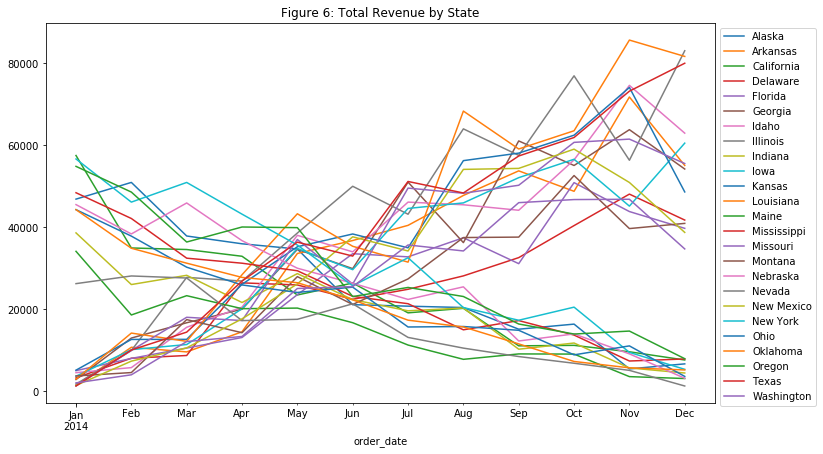

In [11]:
ax = orders_state_total.plot(figsize=(12, 7), title='Figure 6: Total Revenue by State')
ax.legend(bbox_to_anchor=(1,1))

# Average revenue by state
Along with total revenue, we can plot average revenue per state by month. This plot is even more interesting. All of the states have decreasing average revenue over time. This is potentially very bad. Perhaps, market share is being gained by sacrificing the price per order.

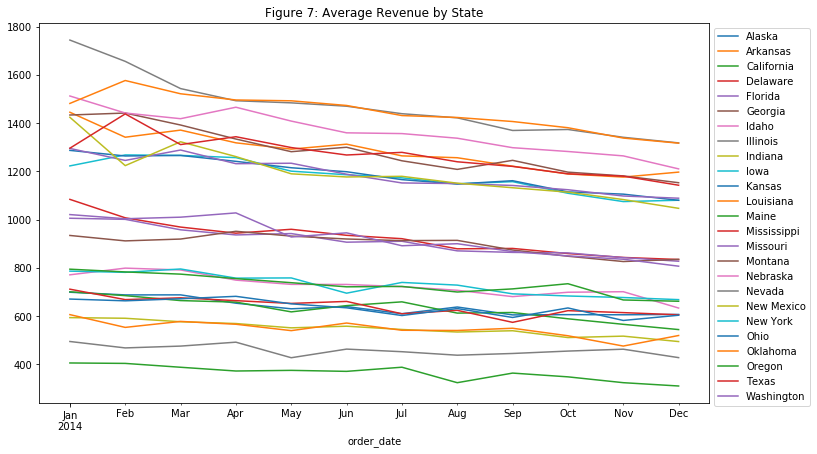

In [12]:
orders_state_avg = orders.pivot_table(index=tg, columns='state', values='revenue')
orders_state_avg.plot(figsize=(12, 7), title='Figure 7: Average Revenue by State').legend(bbox_to_anchor=(1,1))

# Why are total revenue and average orders rising overall but every state is seeing a decline in average revenue?
Overall total and average revenue increased throughout the year (figures 4 and 5) which looks fantastic but average revenue on a state-by-state basis is falling for every state (figure 6). This seems like a paradox. 

Some states are increasing total revenue over time with others decreasing total revenue over time. Let's create a new category for each state for each of these groups of states.

In [13]:
# reprint total revenue per state
orders_state_total

state,Alaska,Arkansas,California,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,...,Montana,Nebraska,Nevada,New Mexico,New York,Ohio,Oklahoma,Oregon,Texas,Washington
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,46852.0,1445.0,57488.0,3252.0,5029.0,2867.0,4537.0,1744.0,38614.0,3668.0,...,3738.0,45514.0,26245.0,1424.0,56641.0,44284.0,44276.0,54839.0,1296.0,2042.0
2014-02-28,50926.0,10732.0,34943.0,8061.0,8010.0,12975.0,5767.0,9935.0,26023.0,10145.0,...,4560.0,38359.0,28115.0,7343.0,46122.0,37831.0,34877.0,48568.0,10067.0,4015.0
2014-03-31,37860.0,9597.0,34562.0,8723.0,10537.0,16705.0,15601.0,27774.0,28274.0,11396.0,...,17473.0,45913.0,27616.0,10581.0,50917.0,30251.0,31233.0,36390.0,14421.0,12123.0
2014-04-30,35960.0,14501.0,32918.0,26431.0,13113.0,20010.0,20521.0,26868.0,21643.0,20112.0,...,14276.0,36721.0,17232.0,17658.0,43186.0,25928.0,27764.0,40054.0,26871.0,13363.0
2014-05-31,34685.0,33597.0,23480.0,25922.0,23559.0,34602.0,38025.0,38581.0,28692.0,34826.0,...,27956.0,30006.0,17545.0,26177.0,35651.0,24094.0,26468.0,39894.0,36363.0,25061.0
2014-06-30,21115.0,36756.0,26395.0,22443.0,33545.0,29898.0,33992.0,49981.0,22341.0,29650.0,...,21156.0,26334.0,21328.0,37659.0,25727.0,25390.0,22295.0,23095.0,32964.0,25524.0
2014-07-31,20751.0,40456.0,19124.0,24870.0,32775.0,50998.0,46123.0,43168.0,19619.0,44582.0,...,27394.0,22396.0,13133.0,34206.0,32555.0,15673.0,17334.0,25316.0,51153.0,35674.0
2014-08-31,20418.0,47748.0,20223.0,28133.0,37439.0,36247.0,45472.0,63983.0,20309.0,45929.0,...,37482.0,25463.0,10521.0,54100.0,20406.0,15791.0,15684.0,23106.0,48350.0,34212.0
2014-09-30,15134.0,53743.0,11076.0,32588.0,31116.0,61039.0,44136.0,57519.0,10255.0,52084.0,...,37590.0,12260.0,8465.0,54344.0,17316.0,14869.0,11551.0,16402.0,57369.0,45990.0


### Making a group column
We will make a new column in our DataFrame that categorizes each state as **Up** or **Down** based on the total revenue over the year.

To do this, we will compare the first row (January) to the last row (December) from the **`orders_state_total`** table. This will result in a boolean value which will then be mapped to Up or Down with the **`map`** Series method.

In [14]:
jan = orders_state_total.iloc[0]
dec = orders_state_total.iloc[-1]
jan

state
Alaska         46852.0
Arkansas        1445.0
California     57488.0
Delaware        3252.0
Florida         5029.0
Georgia         2867.0
Idaho           4537.0
Illinois        1744.0
Indiana        38614.0
Iowa            3668.0
Kansas          5148.0
Louisiana       2963.0
Maine          34122.0
Mississippi    48410.0
Missouri        1295.0
Montana         3738.0
Nebraska       45514.0
Nevada         26245.0
New Mexico      1424.0
New York       56641.0
Ohio           44284.0
Oklahoma       44276.0
Oregon         54839.0
Texas           1296.0
Washington      2042.0
Name: 2014-01-31 00:00:00, dtype: float64

In [15]:
states_up = jan < dec
states_up

state
Alaska         False
Arkansas        True
California     False
Delaware        True
Florida         True
Georgia         True
Idaho           True
Illinois        True
Indiana        False
Iowa            True
Kansas          True
Louisiana       True
Maine          False
Mississippi    False
Missouri        True
Montana         True
Nebraska       False
Nevada         False
New Mexico      True
New York       False
Ohio           False
Oklahoma       False
Oregon         False
Texas           True
Washington      True
dtype: bool

In [16]:
state_names_up = states_up[states_up].index
state_names_up

Index(['Arkansas', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois',
       'Iowa', 'Kansas', 'Louisiana', 'Missouri', 'Montana', 'New Mexico',
       'Texas', 'Washington'],
      dtype='object', name='state')

### Adding column to track revenue group

In [17]:
orders['revenue_group'] = orders['state'].isin(state_names_up)
orders.head(10)

,state,order_date,revenue,revenue_group
0,Arkansas,2014-12-24,1311.0,True
1,Florida,2014-10-15,698.0,True
2,Iowa,2014-09-07,1193.0,True
3,Indiana,2014-05-19,469.0,False
4,Maine,2014-04-19,334.0,False
5,Arkansas,2014-12-07,1200.0,True
6,Idaho,2014-11-15,1258.0,True
7,Alaska,2014-04-19,716.0,False
8,Missouri,2014-06-27,1300.0,True
9,Maine,2014-04-08,260.0,False


## Map booleans to Strings

In [18]:
orders['revenue_group'] = orders['revenue_group'].map({True: 'Up', False: 'Down'})
orders.head()

,state,order_date,revenue,revenue_group
0,Arkansas,2014-12-24,1311.0,Up
1,Florida,2014-10-15,698.0,Up
2,Iowa,2014-09-07,1193.0,Up
3,Indiana,2014-05-19,469.0,Down
4,Maine,2014-04-19,334.0,Down


# Overall average revenue for states where revenue went up vs those that went down
Classifying the states into two groups makes the analysis easier. We now look at the average revenue per order from those two groups over the year. The **Up** group looks to have about double the revenue per order than the **Down** group.

In [19]:
tg = pd.Grouper(freq='M', key='order_date')

In [20]:
orders_updown = orders.pivot_table(index=tg, columns='revenue_group', values='revenue')
orders_updown

revenue_group,Down,Up
order_date,,
2014-01-31,656.048813,1225.696970
2014-02-28,648.317384,1283.990000
2014-03-31,641.991525,1244.037736
2014-04-30,633.843810,1230.435345
2014-05-31,604.639376,1204.701571
2014-06-30,598.768868,1186.947644
2014-07-31,606.997222,1159.741525
2014-08-31,597.214724,1151.814488
2014-09-30,579.318548,1131.744300


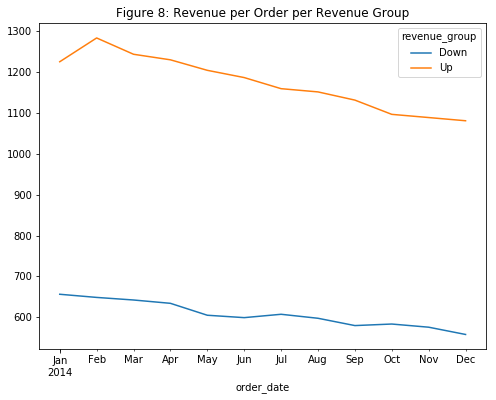

In [21]:
orders_updown.plot(figsize=(8,6), title='Figure 8: Revenue per Order per Revenue Group')

# Frequency of orders per revenue group
The frequency of the orders per revenue group is plotted in figure 9. This figure shows a very interesting trend. The Down group is making much fewer orders over the course of the year and in fact some states are heading towards no orders at all. The Up group on the other hand is making more orders every month.

We can now explain the paradox of increasing overall total and average revenue but having every state decreasing average revenue per order. The states with high average orders, the Up states had few orders at the beginning of the year and increased in frequency quite a bit from the start of the year. Conversely, states with lower than average revenue per order, the Down states, drastically decreased the number of orders over the year.

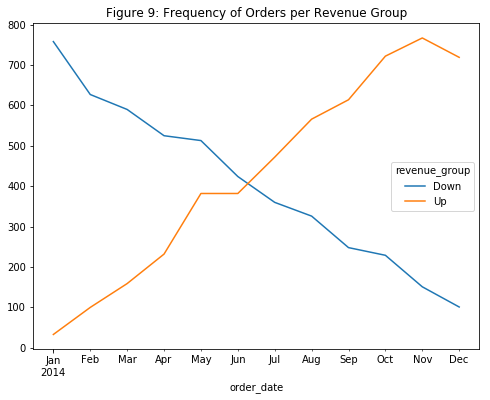

In [22]:
orders.pivot_table(index=tg, columns='revenue_group', values='revenue', aggfunc='size') \
      .plot(figsize=(8,6), title='Figure 9: Frequency of Orders per Revenue Group')

# Conclusion
Revenue per order is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because high average revenue states greatly increased their number of order as the year went on. The states that had low average revenue decreased in number of orders from the start of the year. 

Is this good or bad? Probably too difficult to tell without more information but it is troublesome that every single state had it's average revenue per order decline. This trend cannot continue indefinitely.